# **MODEL DEVELOPMENT**

Learning Objectives
+ Describe how to process linear regression in Python
+ Apply model evaluation using visualization in Python
+ Apply polynomial regression techniques to Python
+ Evaluate a data model by using visualization
+ Describe the use of R-squared and MSE for in-sample evaluation
+ Apply prediction and decision making to Python model creation

In [2]:
## import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

**READ THE DATA - CLEAN DF**

Read the data and make a Copy of the Data.

In [6]:
df_clean = pd.read_csv("clean_df.csv", header = 0)
df_clean.head()
## make a copy of the dataset
df = df_clean.copy()

In [9]:
##df.head()
## remove the unnamed column.
column_to_drop = 'Unnamed: 0'
df.drop(column_to_drop, axis=1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,13495.0,11.190476,8.703704,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,21,27,16500.0,11.190476,8.703704,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,19,26,16500.0,12.368421,9.038462,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,24,30,13950.0,9.791667,7.833333,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,18,22,17450.0,13.055556,10.681818,Low,0,1,1,0


**LINEAR REGRESSION**

**Simple Linear Regression**
Simple Linear Regression is a method to help us understand the relationship between two variables:

+ The predictor/independent variable (X)
+ The response/dependent variable (that we want to predict)(Y)

In [12]:
## import the linearregression module from the sklearn.
from sklearn.linear_model import LinearRegression
## create a linear regression object.
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [21]:
## predicting the highway mpg and price relationship using simple linear regression.
X = df[["highway-mpg"]]
Y = df["price"]

## fit the lin_reg model using the X and Y
lin_reg.fit(X,Y)

## output a prediction
Yhat=lin_reg.predict(X)
print("Predicting the First five Values :--",Yhat[0:5])   

## intercept value
print("The Intercept Value :--",lin_reg.intercept_)

## value of the slope
print("The Slope value :--", lin_reg.coef_)

Predicting the First five Values :-- [16236.50464347 16236.50464347 17058.23802179 13771.3045085
 20345.17153508]
The Intercept Value :-- 38423.3058581574
The Slope value :-- [-821.73337832]


                               `General Equation = Price = 38423.31 - 821.73 x highway-mpg`
                                
                            The above Equation is the General Equation to find out the Price of the Car
                                by the highway-mpg Value given.
                                
******

In [23]:
## checking the price relation ship between engine size using linear regression.

lin_reg_2 = LinearRegression()

X = df[["engine-size"]]
Y = df["price"]

lin_reg_2.fit(X,Y)

## prediction
Yhat_2 = lin_reg_2.predict(X)
print("Prediction of 5 Values :--",Yhat_2[0:5])

## intercept value
print("Intercept Value :--", lin_reg_2.intercept_)

## slope value
print("Slope value is :--", lin_reg_2.coef_)

Prediction of 5 Values :-- [13728.4631336  13728.4631336  17399.38347881 10224.40280408
 14729.62322775]
Intercept Value :-- -7963.338906281046
Slope value is :-- [166.86001569]


                                    General Equation : -7963.33 + 166.86 * engine-size

******

**MULTIPLE LINEAR REGRESSION**

Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables.

In [28]:
## taking the different variables to predict the proce
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
Y = df["price"]

## create a regression object
mul_reg = LinearRegression()
print(mul_reg)

## fit the regression object with the Z and Y
mul_reg.fit(Z, Y)

## predict the first five outputs
Yhat = mul_reg.predict(Z)
Yhat[0:5]

print("Intercept value :--", mul_reg.intercept_)

print("Slope Value :--", mul_reg.coef_)

LinearRegression()
Intercept value :-- -15831.930960299462
Slope Value :-- [53.66247317  4.70938694 81.44600167 36.55016267]


**General Equation : Price = -15831.9 + (53.66 * horsepower) + (4.7 * curb-weight) + (81.4 * engine-size) + (36.55 * highway-mpg)**

*****

**MODEL EVALUATION USING VISUALIZATION**

+ To Evaluate the Model, we can Visualize the Models created.
+ In simple linear regression, an excellent way to visualize the fit of our model is by using regression plots.
+ This plot will show a combination of a scattered data points (a scatterplot), as well as the fitted linear regression line going through the data.
+ This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

In [29]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0.0, 48174.368899400935)

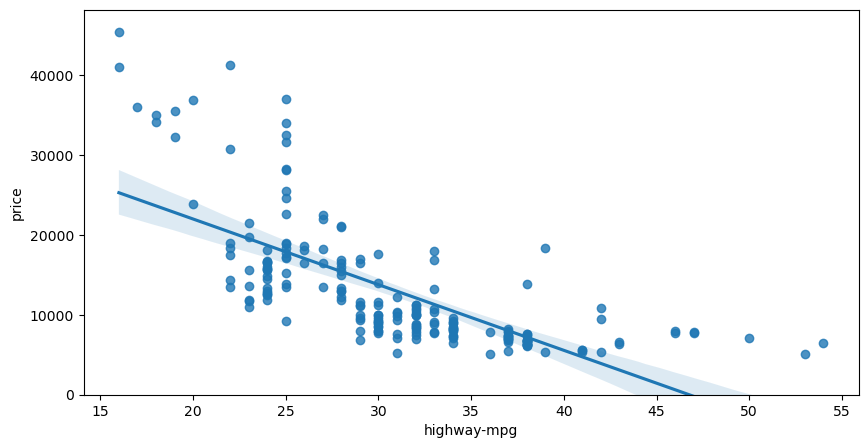

In [34]:
width = 10
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

+ The price is negatively correlated to highway-mpg since the regression slope is negative.
+ One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. 
+ This will give you a good indication of the variance of the data and whether a linear model would be the best fit or not. 
+ If the data is too far off from the line, this linear model might not be the best model for this data.

(0.0, 47414.1)

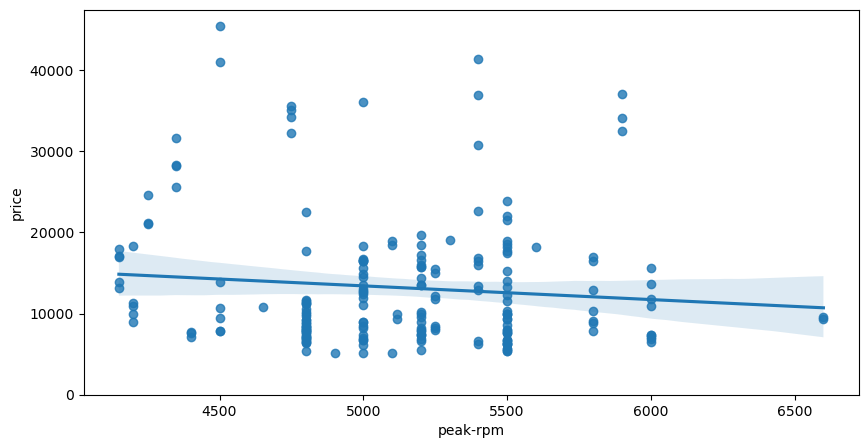

In [35]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

+ Comparing the regression plot of "peak-rpm" and "highway-mpg", we see that the points for "highway-mpg" are much closer to the generated line and, on average, decrease.
+ The points for "peak-rpm" have more spread around the predicted line and it is much harder to determine if the points are decreasing or increasing as the "peak-rpm" increases.

*****

**RESISUAL PLOT**

+ A good way to visualize the variance of the data is to use a residual plot.
+ What is Residual : The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e)
+ A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.
+ If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.
+ Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

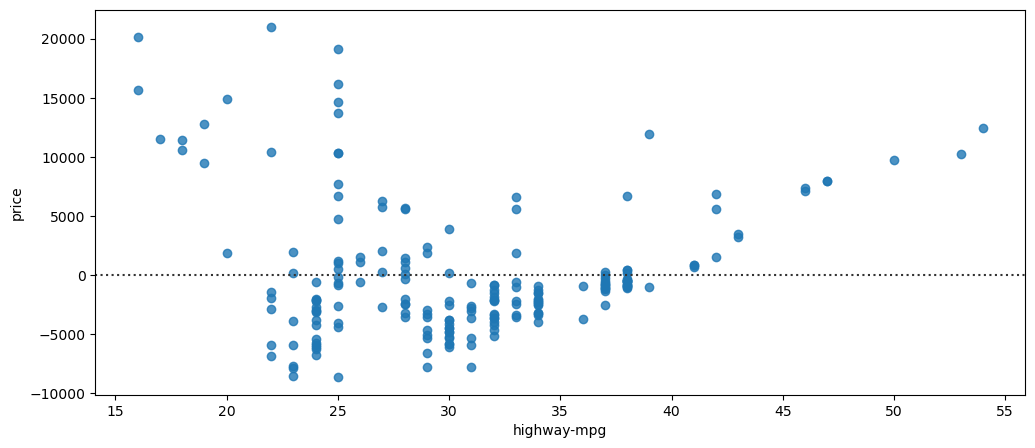

In [36]:
width = 12
height = 5
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

**The residual plot that the residuals are not randomly spread around the x-axis, leading us to believe that maybe a non-linear model is more appropriate for this data.**

****

**MULTIPLE LINEAR REGRESSION**

+ To visualize Multiple Linear Regression we can use distribution plot. 
+ We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [38]:
Z.head()

,horsepower,curb-weight,engine-size,highway-mpg
0,111,2548,130,27
1,111,2548,130,27
2,154,2823,152,26
3,102,2337,109,30
4,115,2824,136,22


In [41]:
Y_hat = mul_reg.predict(Z)
Y_hat[0:5]

array([13698.95609311, 13698.95609311, 19056.78572196, 10621.59764327,
       15519.32197778])

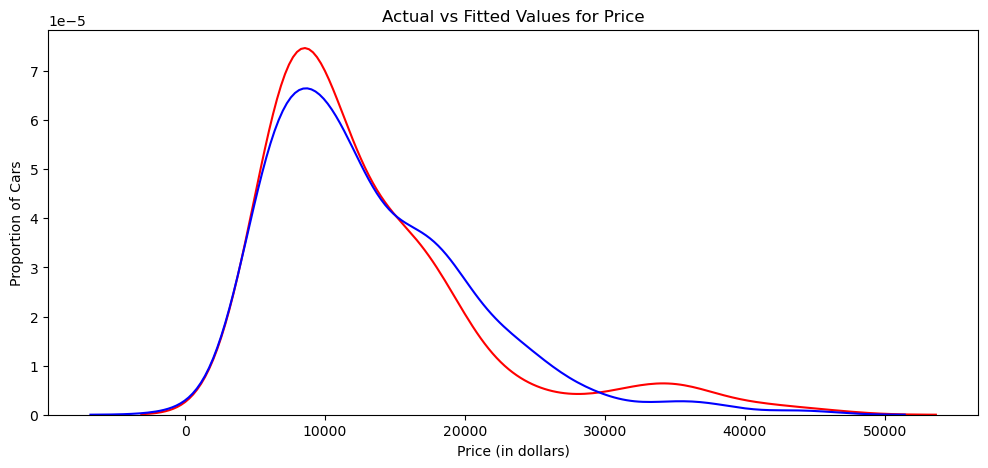

In [42]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values since the two distributions overlap a bit. However, there is definitely some room for improvement.

****

**POLYNOMIAL REGRESSION AND PIPELINES**

Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.

We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

In [43]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [44]:
## implementing polynomial regression
X = df['highway-mpg']
Y = df['price']

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(X, Y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


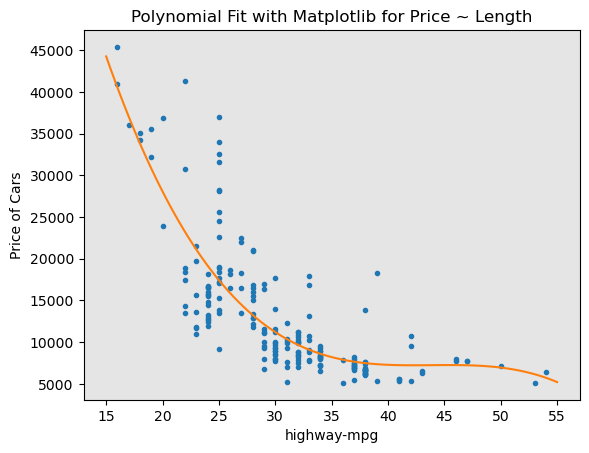

In [45]:
## plot the function
PlotPolly(p, X, Y, 'highway-mpg')

In [46]:
np.polyfit(X, Y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

**Performing the Polynomial Regression on Multiple Features**

In [48]:
from sklearn.preprocessing import PolynomialFeatures

## creating a polynomial regression object
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [49]:
Z_pr=pr.fit_transform(Z)

In [50]:
Z.shape

(201, 4)

In [51]:
Z_pr.shape

(201, 15)

+ Data Pipelines simplify the steps of processing the data. 
+ We use the module Pipeline to create a pipeline. 
+ We also use StandardScaler as a step in our pipeline.

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline by creating a list of tuples including the name of the model or estimator and its corresponding constructor

In [54]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
Input

[('scale', StandardScaler()),
 ('polynomial', PolynomialFeatures(include_bias=False)),
 ('model', LinearRegression())]

In [55]:
## input this to pipeline constructor
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

+ First, we convert the data type Z to type float to avoid conversion warnings that may appear as a result of StandardScaler taking float inputs.
+ Then, we can normalize the data, perform a transform and fit the model simultaneously.

In [57]:
Z = Z.astype(float)
pipe.fit(Z,Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

In [58]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([13103.67557905, 13103.67557905, 18229.84126783, 10394.17656982])

******

**MEASURES FOR INSAMPLE EVALUATION**

When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:

1. R^2 / R-squared
2. Mean Squared Error (MSE)

**R-squared**

R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.

The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE)**

The Mean Squared Error measures the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

**Simple Linear Regression**

In [65]:
#highway_mpg_fit
X = df[["highway-mpg"]]
Y = df["price"]
lin_reg.fit(X, Y)
# Find the R^2
print('The R-square is: ', lin_reg.score(X, Y))

The R-square is:  0.4965911884339176


We can say that ~49.659% of the variation of the price is explained by this simple linear model "horsepower_fit"

In [66]:
Yhat=lin_reg.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [67]:
## calculating the mean squarred error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


**Multiple Linear Regression**



In [68]:
# fit the model 
mul_reg.fit(Z, df['price'])
# Find the R^2
print('The R-square is: ', mul_reg.score(Z, df['price']))

The R-square is:  0.80943904228153


We can say that ~80.896 % of the variation of price is explained by this multiple linear regression "multi_fit

In [71]:
Y_predict_multifit = mul_reg.predict(Z)
# Y_predict_multifit

In [72]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11975165.993303552


**Polynomial Regression**

Let’s import the function r2_score from the module metrics as we are using a different function

In [75]:
from sklearn.metrics import r2_score

r_squared = r2_score(Y, p(X))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~67.419 % of the variation of price is explained by this polynomial fit.

In [76]:
mean_squared_error(df['price'], p(X))

20474146.426361207

**PREDICTION AND DECISION MAKING**

**Prediction**



In [77]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [78]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [79]:
lin_reg.fit(X, Y)
lin_reg

LinearRegression()

In [80]:
yhat=lin_reg.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

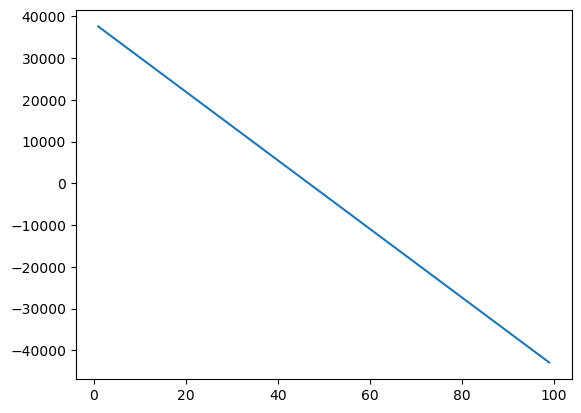

In [81]:
plt.plot(new_input, yhat)
plt.show()

**Decision Making: Determining a Good Model Fit**


Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?


What is a good R-squared value?
+ When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
+ When comparing models, the model with the smallest MSE value is a better fit for the data.

*****

Let's take a look at the values for the different models.


**Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.**

+ R-squared: 0.49659118843391759
+ MSE: 3.16 x10^7


**Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.**

+ R-squared: 0.80896354913783497
+ MSE: 1.2 x10^7


**Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.**

+ R-squared: 0.6741946663906514
+ MSE: 2.05 x 10^7

*****

**Simple Linear Regression Model (SLR) vs Multiple Linear Regression Model (MLR)**

+ Usually, the more variables you have, the better your model is at predicting, but this is not always true. 
+ Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and even act as noise. 
+ As a result, you should always check the MSE and R^2.
+ In order to compare the results of the MLR vs SLR models, 
+ we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

+ MSE: The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.
+ R-squared: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. 
+ The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).
+ This R-squared in combination with the MSE show that MLR seems like the better model fit in this case compared to SLR.

**Simple Linear Model (SLR) vs. Polynomial Fit**


+ MSE: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
+ R-squared: The R-squared for the Polynomial Fit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.
+ Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, 
+ we can conclude that this was a better fit model than the simple linear regression for predicting "price" with "highway-mpg" as a predictor variable.

**Multiple Linear Regression (MLR) vs. Polynomial Fit**


+ MSE: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
+ R-squared: The R-squared for the MLR is also much larger than for the Polynomial Fit.


*****